## Severity convention distribution between EMS 98 and EMS copernicus

In [2]:
import os
import json

# Define the directory path
dir_path = '/home/merlo/multitask-segmentation/Download_Dataset_CEMS/copernicusData/cems-rm-viewer'

damageLevel = {"destruction" :          ["Destroyed" , "Destruction"],                              #level 4
                "high damage" :         ["Damaged", "High damage"],                                 #level 3
                "moderate damage" :     ["Possibly damaged", "Moderate damage"],                    #level 2
                "negligible damage":    ["Negligible to slight damage"],                            #level 1
                "not analized":         ["Not analyzed", "No visible damage"]                       #level 0
            } 

list_EMS_copernicus = []
list_EMS_98 = []

for root, dirs, files in os.walk(dir_path):
    for file in files:
        if '_GRA_PRODUCT_naturalLandUseA' in file:

            with open(os.path.join(root, file)) as f:
                features = json.load(f)["features"]
                
                for feature in features:
                    if feature["properties"]["damage_gra"] == "Negligible to slight damage":
                        list_EMS_98.append(file)
                        break
                    elif feature["properties"]["damage_gra"] == "Moderate damage":
                        list_EMS_98.append(file)
                        break
                    elif feature["properties"]["damage_gra"] == "Damaged":
                        list_EMS_copernicus.append(file)
                        break
                    elif feature["properties"]["damage_gra"] == "Possibly damaged":
                        list_EMS_copernicus.append(file)
                        break
                    elif feature["properties"]["damage_gra"] == "High damage":
                        list_EMS_98.append(file)
                        break
        
                
print(f"EMS-Copernicus: \n{list_EMS_copernicus}")
print(f"EMS-98: \n{list_EMS_98}")
print(f"\nTotal EMS-Copernicus: {len(list_EMS_copernicus)}")
print(f"Total EMS-98: {len(list_EMS_98)}")
list_EMS_98_ = list_EMS_98.copy()

EMS-Copernicus: 
['EMSR288_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR600_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR278_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR613_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR533_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR533_AOI02_GRA_PRODUCT_naturalLandUseA.json', 'EMSR596_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR601_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR531_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR254_AOI03_GRA_PRODUCT_naturalLandUseA.json', 'EMSR254_AOI04_GRA_PRODUCT_naturalLandUseA.json', 'EMSR254_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR254_AOI02_GRA_PRODUCT_naturalLandUseA.json', 'EMSR453_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR373_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR512_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR305_AOI01_GRA_PRODUCT_naturalLandUseA.json', 'EMSR523_AOI05_GRA_PRODUCT_naturalLandUseA.json', 'EMSR523_AOI08_GRA_PRODUCT_naturalLandUseA.json', 'EMSR523_AOI02_GRA_PRODUCT_natur

## Dataset grading distribution and subdivision

In [4]:
import pprint
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/cross_validation/satelliteData_6folds_Severity.csv")
fold_list = df.groupby('fold')

# create a dictionary with fold numbers as keys and lists of countries as values
group_dict = {group: list(folds) for group, folds in fold_list['country']}
# create subdict for counting number of images per countries in that fold
result_dict = {key: {elem: value.count(elem) for elem in set(value)} for key, value in group_dict.items()}
pprint.pprint(result_dict)

# fold counting
print("Folds: count")
sum_dict = {}

for key, inner_dict in result_dict.items():
    inner_sum = sum(inner_dict.values())
    sum_dict[key] = inner_sum


for key,value in sum_dict.items():
    print(key, ':', value)

{0: {'Albania': 4,
     'France': 7,
     'Italy': 21,
     'Portugal': 14,
     'Spain': 21,
     'Sweden': 4,
     'United Kingdom': 1},
 1: {'Portugal': 47, 'Spain': 11},
 2: {'Croatia': 1, 'France': 5, 'Italy': 24, 'Slovenia': 2, 'Spain': 18},
 3: {'Cyprus': 1, 'Greece': 38},
 4: {'Czechia': 1,
     'Falkland Islands': 1,
     'France': 3,
     'Georgia': 1,
     'Germany': 7,
     'Greece': 1,
     'Greenland': 1,
     'Hungary': 2,
     'Latvia': 1,
     'Mexico': 2,
     'Poland': 1,
     'Spain': 3},
 5: {'Greece': 3,
     'Italy': 10,
     'Mexico': 1,
     'North Macedonia': 5,
     'Portugal': 4,
     'Spain': 12,
     'Ukraine': 1,
     'United Kingdom': 2},
 6: {'Algeria': 18, 'Australia': 3, 'Lebanon': 3, 'Spain': 25}}
Folds: count
0 : 72
1 : 58
2 : 50
3 : 39
4 : 24
5 : 38
6 : 49


In [5]:
# percentage of area burned per fold
df["area"] = df["width"] * df["height"]
dfGrouped_burn = df.groupby("fold")["pixelBurned"].sum()
dfGrouped_total= df.groupby("fold")["area"].sum()
dfGrouped = dfGrouped_burn/dfGrouped_total * 100
dfGrouped

# finire col datetime
# finire col argparse per numero fold in test

fold
0    14.330010
1    26.751961
2    20.057674
3    31.256946
4    27.499125
5    21.355655
6    19.159911
dtype: float64

In [6]:
# print distribution
fold_list = df.groupby('fold')
# create a dictionary with fold numbers as keys and lists of countries as values
group_dict = {group: list(folds) for group, folds in fold_list['country']}
# create subdict for counting number of images per countries in that fold
result_dict = {key: {elem: value.count(elem) for elem in set(value)} for key, value in group_dict.items()}
pprint.pprint(result_dict)

{0: {'Albania': 4,
     'France': 7,
     'Italy': 21,
     'Portugal': 14,
     'Spain': 21,
     'Sweden': 4,
     'United Kingdom': 1},
 1: {'Portugal': 47, 'Spain': 11},
 2: {'Croatia': 1, 'France': 5, 'Italy': 24, 'Slovenia': 2, 'Spain': 18},
 3: {'Cyprus': 1, 'Greece': 38},
 4: {'Czechia': 1,
     'Falkland Islands': 1,
     'France': 3,
     'Georgia': 1,
     'Germany': 7,
     'Greece': 1,
     'Greenland': 1,
     'Hungary': 2,
     'Latvia': 1,
     'Mexico': 2,
     'Poland': 1,
     'Spain': 3},
 5: {'Greece': 3,
     'Italy': 10,
     'Mexico': 1,
     'North Macedonia': 5,
     'Portugal': 4,
     'Spain': 12,
     'Ukraine': 1,
     'United Kingdom': 2},
 6: {'Algeria': 18, 'Australia': 3, 'Lebanon': 3, 'Spain': 25}}


## Dataset displayed on map

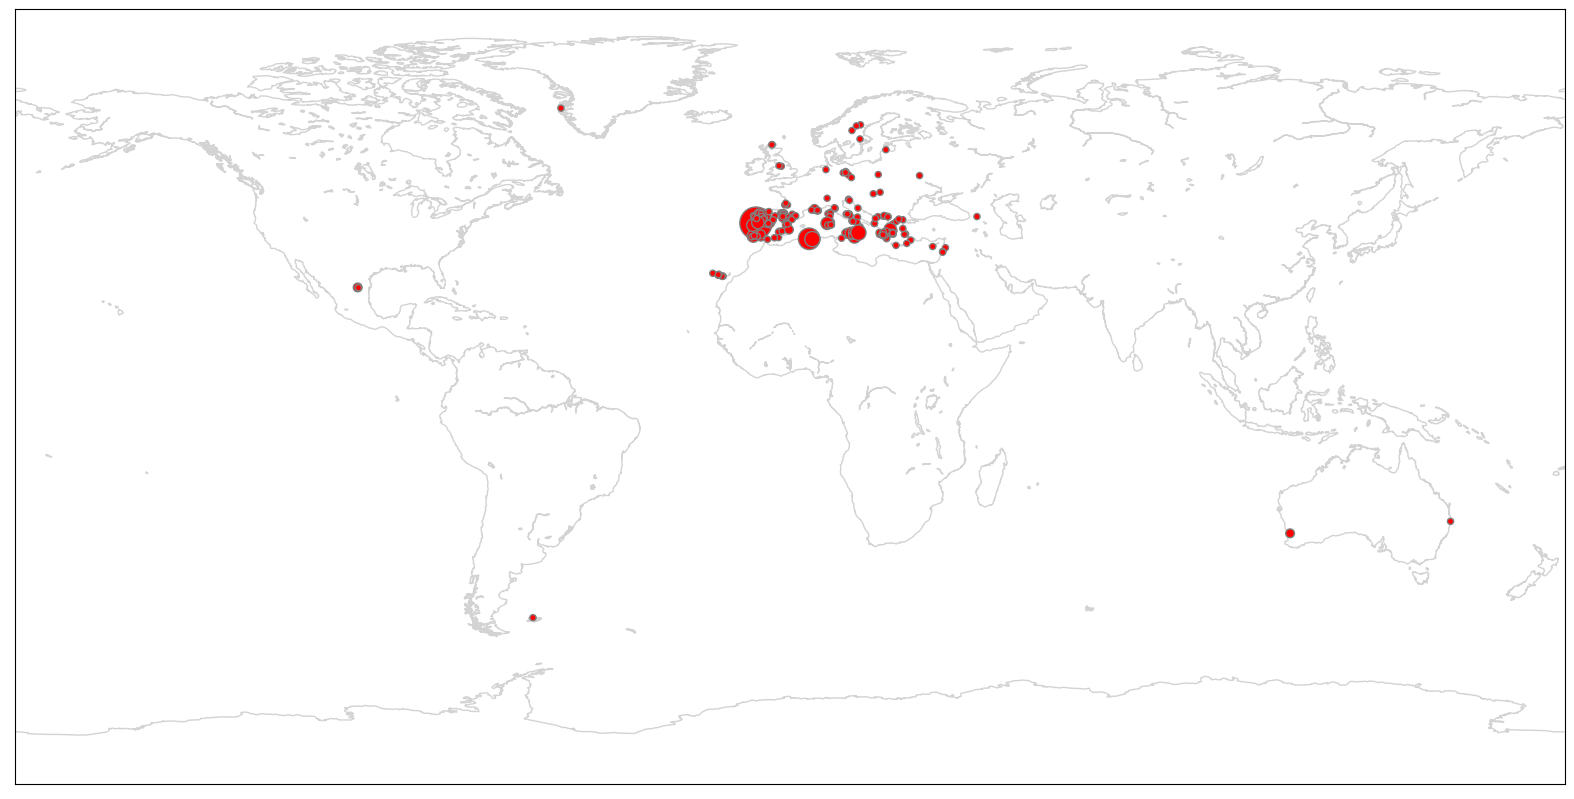

In [7]:
import pprint
import pandas as pd
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

original_path = "dataset/satelliteData.csv"
# path = "dataset/casual_sparsity/satelliteDataTrain.csv"

# ALL EMSR IN ONE MAP
df = pd.read_csv(original_path)
df = df[ (df["folder"] == "optimal") & (df["GRA"] == 1) & (df["pixelBurned"] > 2500)]
df = df.drop(columns=["interval_startDate","interval_endDate","left_Long","bottom_Lat","right_Long","top_Lat"])

grouped_df = df.groupby(["EMSR", "AOI"]).agg({"centerBoxLong": "mean", "centerBoxLat": "mean", "AOI": "count"})
grouped_df = grouped_df.rename(columns={"weight": "mean_weight", "AOI": "count"})


lat = grouped_df['centerBoxLat'].values
lon = grouped_df['centerBoxLong'].values
count = grouped_df['count'].values

fig = plt.figure(figsize=(20, 20))

m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
# m.shadedrelief()
m.drawcoastlines(color='lightgray', zorder=1)
# m.drawcountries(color='gray')
# m.drawstates(color='gray')

m.scatter(lon, lat, latlon=True,
          s=count*20,
          color ='red', alpha=1, edgecolors='gray')

# create colorbar and legend
plt.clim(3, 7)

# path = path.replace(".csv", ".png")
# plt.savefig(path, bbox_inches='tight', pad_inches=0)


Totale immagini: 330


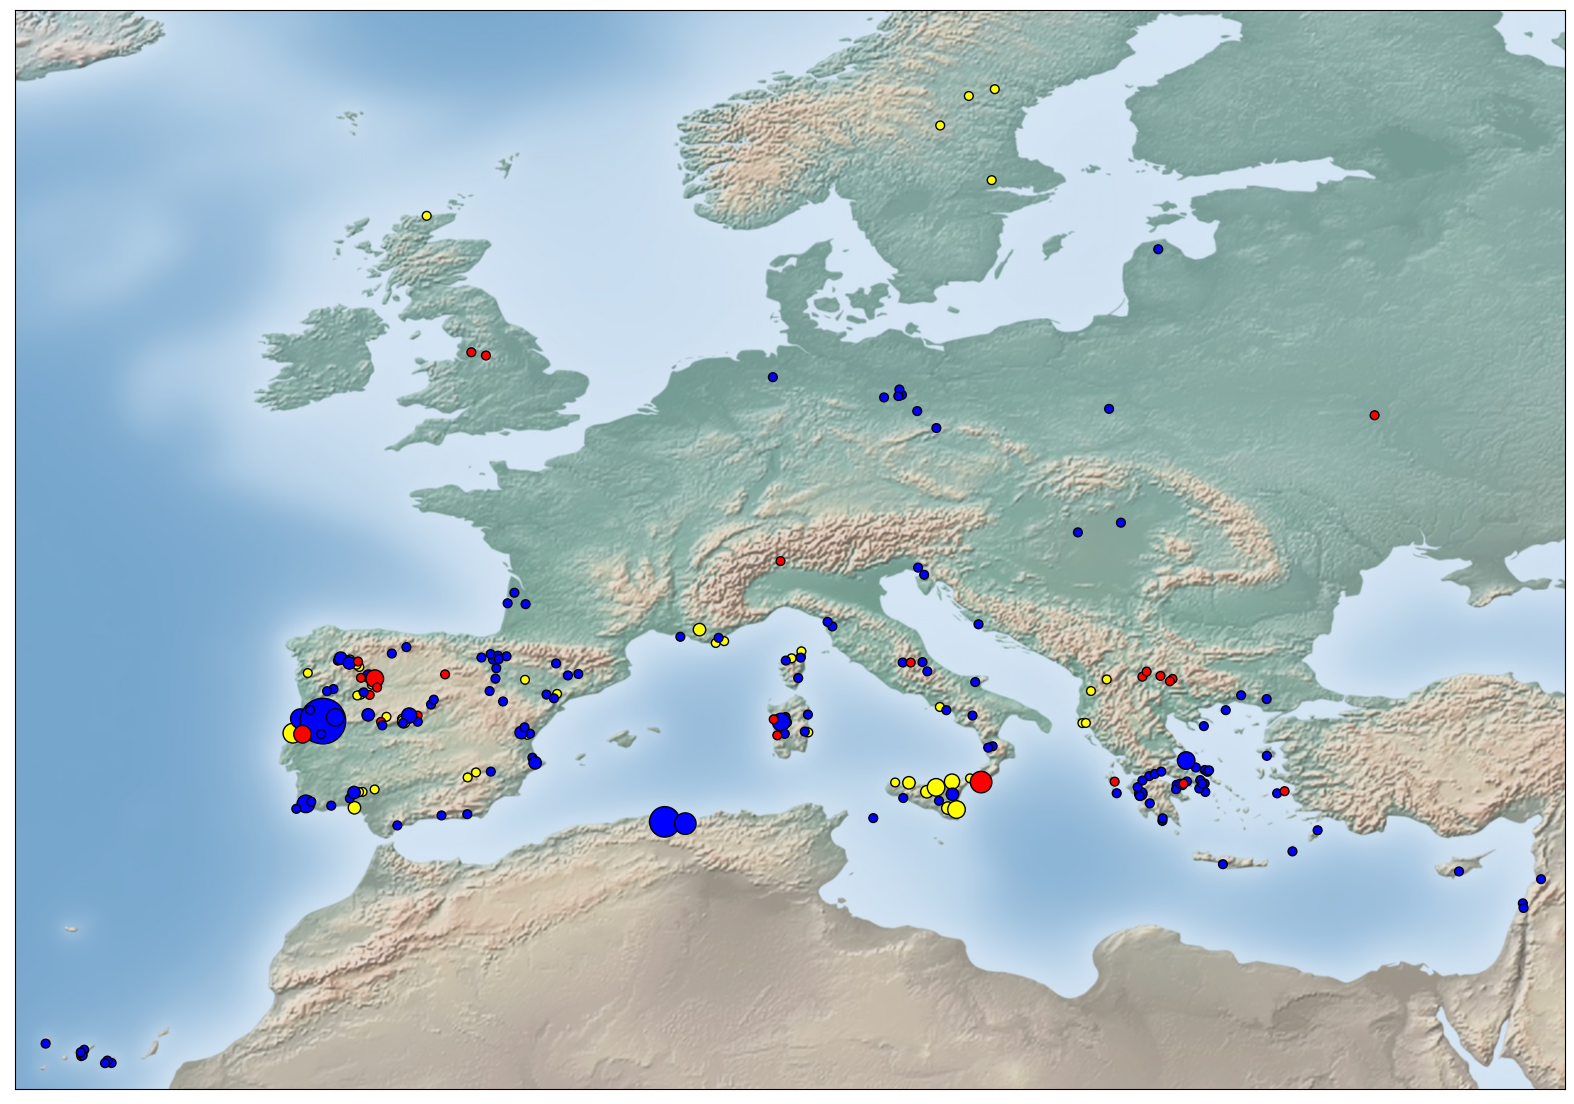

{0: {'Albania': 4,
     'France': 7,
     'Italy': 21,
     'Portugal': 14,
     'Spain': 21,
     'Sweden': 4,
     'United Kingdom': 1},
 1: {'Portugal': 47, 'Spain': 11},
 2: {'Croatia': 1, 'France': 5, 'Italy': 24, 'Slovenia': 2, 'Spain': 18},
 3: {'Cyprus': 1, 'Greece': 38},
 4: {'Czechia': 1,
     'Falkland Islands': 1,
     'France': 3,
     'Georgia': 1,
     'Germany': 7,
     'Greece': 1,
     'Greenland': 1,
     'Hungary': 2,
     'Latvia': 1,
     'Mexico': 2,
     'Poland': 1,
     'Spain': 3},
 5: {'Greece': 3,
     'Italy': 10,
     'Mexico': 1,
     'North Macedonia': 5,
     'Portugal': 4,
     'Spain': 12,
     'Ukraine': 1,
     'United Kingdom': 2},
 6: {'Algeria': 18, 'Australia': 3, 'Lebanon': 3, 'Spain': 25}}
----------------------------------
{0: {'BSk': 6, 'Cfa': 1, 'Cfb': 1, 'Csa': 38, 'Csb': 21, 'Dfb': 2, 'Dfc': 3},
 1: {'Cfc': 1, 'Csa': 24, 'Csb': 33},
 2: {'BSk': 16, 'Cfa': 3, 'Cfb': 3, 'Csa': 24, 'Csb': 3, 'Dfb': 1},
 3: {'Csa': 39},
 4: {'Cfb': 5, 'Cfc':

In [8]:
import pprint
import pandas as pd
import numpy as np
import math

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

path = "dataset/cross_validation/satelliteData_6folds_Severity.csv"
df = pd.read_csv(path)
print(f"Totale immagini: {len(df)}")

grouped_df = df.groupby(["fold", "EMSR", "AOI"]).agg({"centerBoxLong": "mean", "centerBoxLat": "mean", "AOI": "count"}) # pixelBurned = AOI count = sum
grouped_df = grouped_df.rename(columns={"weight": "mean_weight", "AOI": "count"}) # pixelBurned = AOI
grouped_df = grouped_df.reset_index()
# print(f"{grouped_df['count'].values}")
lat = grouped_df['centerBoxLat'].values
lon = grouped_df['centerBoxLong'].values
# grouped_df['count'] = grouped_df['count'].apply(lambda x: np.power(np.log(x), 10) if x > 0 else np.log10(0.01)*100)
# grouped_df['count'] = ((grouped_df['count'] - grouped_df['count'].min()) / (grouped_df['count'].max() - grouped_df['count'].min()) + 0.1) * 400

count = grouped_df['count'].values

colors = {
    0: "yellow",
    1: "blue",
    2: "blue",
    3: "blue",
    4: "blue",
    5: "red",
    6: "blue",
    7: "blue",
    
    # 8: "blue",
    # 9: "blue",
    # 10: "blue"

}

grouped_df['color'] = grouped_df['fold'].map(colors)

fig = plt.figure(figsize=(20, 20))

# Europe
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=27, urcrnrlat=66,
            llcrnrlon=-19, urcrnrlon=37, )

# # World
# m = Basemap(projection='cyl', resolution='c',
#             llcrnrlat=-75, urcrnrlat=75,
#             llcrnrlon=-130, urcrnrlon=160, )

m.shadedrelief()
# m.bluemarble()
# m.drawcoastlines(color='lightgray', zorder=1)
# m.drawcountries(color='gray')


m.scatter(lon, lat, latlon=True,
        color = grouped_df["color"].values,
        s=count*40, alpha=1, edgecolors='black') # count*35

# save
path = path.replace(".csv", ".png")
plt.savefig(path, bbox_inches='tight', pad_inches=0)

plt.show()

#  SHOW DISTRIBUTION PER FOLD
fold_list = df.groupby('fold')
# create a dictionary with fold numbers as keys and lists of countries as values
group_dict = {group: list(folds) for group, folds in fold_list['country']}
# create subdict for counting number of images per countries in that fold
result_dict = {key: {elem: value.count(elem) for elem in set(value)} for key, value in group_dict.items()}
pprint.pprint(result_dict)

print("----------------------------------")

#  SHOW DISTRIBUTION PER FOLD
fold_list = df.groupby('fold')
# create a dictionary with fold numbers as keys and lists of countries as values
group_dict = {group: list(folds) for group, folds in fold_list['koppen_subgroup']}
# create subdict for counting number of images per countries in that fold
result_dict = {key: {elem: value.count(elem) for elem in set(value)} for key, value in group_dict.items()}
pprint.pprint(result_dict)

# fold counting
print("Folds: count")
sum_dict = {}

for key, inner_dict in result_dict.items():
    inner_sum = sum(inner_dict.values())
    sum_dict[key] = inner_sum


for key,value in sum_dict.items():
    print(key, ':', value)

In [9]:
# proportion pixel burned inside crop
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

df = pd.read_csv("dataset/cross_validation/satelliteData_6folds.csv")

df = df[ ((df["folder"] == "optimal") | (df["folder"] == "subOptimal_cloudyClean" )) & (df["DEL"] == 1) & (df["pixelBurned"] > 0)]
# df = df.drop(columns=["centerBoxLong", "country", "resolution_x", "resolution_y", "centerBoxLat", "activationDate", "GRA", "DEL", "FEP", "folder", "interval_startDate","interval_endDate","left_Long","bottom_Lat","right_Long","top_Lat", "koppen_group", "koppen_subgroup"])
df = df.drop(columns=["folderPath", "centerBoxLong", "country", "resolution_x", "resolution_y", "centerBoxLat", "activationDate", "GRA", "DEL", "FEP", "folder", "koppen_group", "koppen_subgroup"])

crop = 512*512

df['proportion'] = df['pixelBurned'] / crop
df = df[ df["proportion"] < 0.03 ]

df = df.sort_values(by=["proportion"], ascending=True,)
# # print(df["pixelBurned"])
print(f"Immagini: {len(df)}")
print(df)

Immagini: 20
        EMSR    AOI  height  width  pixelBurned  fold  proportion
1    EMSR207  AOI01    1448   1973         2629     0    0.010029
225  EMSR523  AOI08     614    798         2733     2    0.010426
379  EMSR626  AOI01     712    802         2765     2    0.010548
53   EMSR217  AOI04     696    658         2815     0    0.010738
189  EMSR430  AOI01     656    651         2835     6    0.010815
37   EMSR213  AOI17     845   1017         3095     2    0.011806
122  EMSR290  AOI03     736    552         3569     0    0.013615
409  EMSR647  AOI02    1811   1942         3762     5    0.014351
152  EMSR368  AOI01    1416   1118         3881     0    0.014805
172  EMSR396  AOI03    1311    568         3962     6    0.015114
438  EMSR647  AOI07    1646   1595         4347     5    0.016582
192  EMSR440  AOI01     730    952         4420     4    0.016861
145  EMSR360  AOI01     683    571         5337     6    0.020359
125  EMSR295  AOI01     730    643         5623     4    0.0214

## Correlation and PCA

1066858
   layer_1     layer_2     layer_3  layer_4  layer_5  layer_6  layer_7  \
0    198.0  138.000000  310.000000    258.0    546.0   1384.0   1525.0   
1    198.0  144.000000  318.000031    269.0    682.0   1505.0   1779.0   
2    198.0  261.000000  464.000000    444.0    682.0   1505.0   1779.0   
3    198.0  248.000000  487.000000    463.0    670.0   1526.0   1696.0   
4    198.0  179.999985  396.000000    342.0    670.0   1526.0   1696.0   

       layer_8      layer_9  layer_10  layer_11  layer_12  label  
0  1685.999878  1745.000000    1893.0    1093.0     601.0      0  
1  1770.000000  1963.000000    1893.0    1218.0     716.0      0  
2  1982.000000  1963.000000    1893.0    1218.0     716.0      0  
3  2014.000000  1976.000122    1893.0    1344.0     783.0      0  
4  1703.999878  1976.000122    1893.0    1344.0     783.0      0  


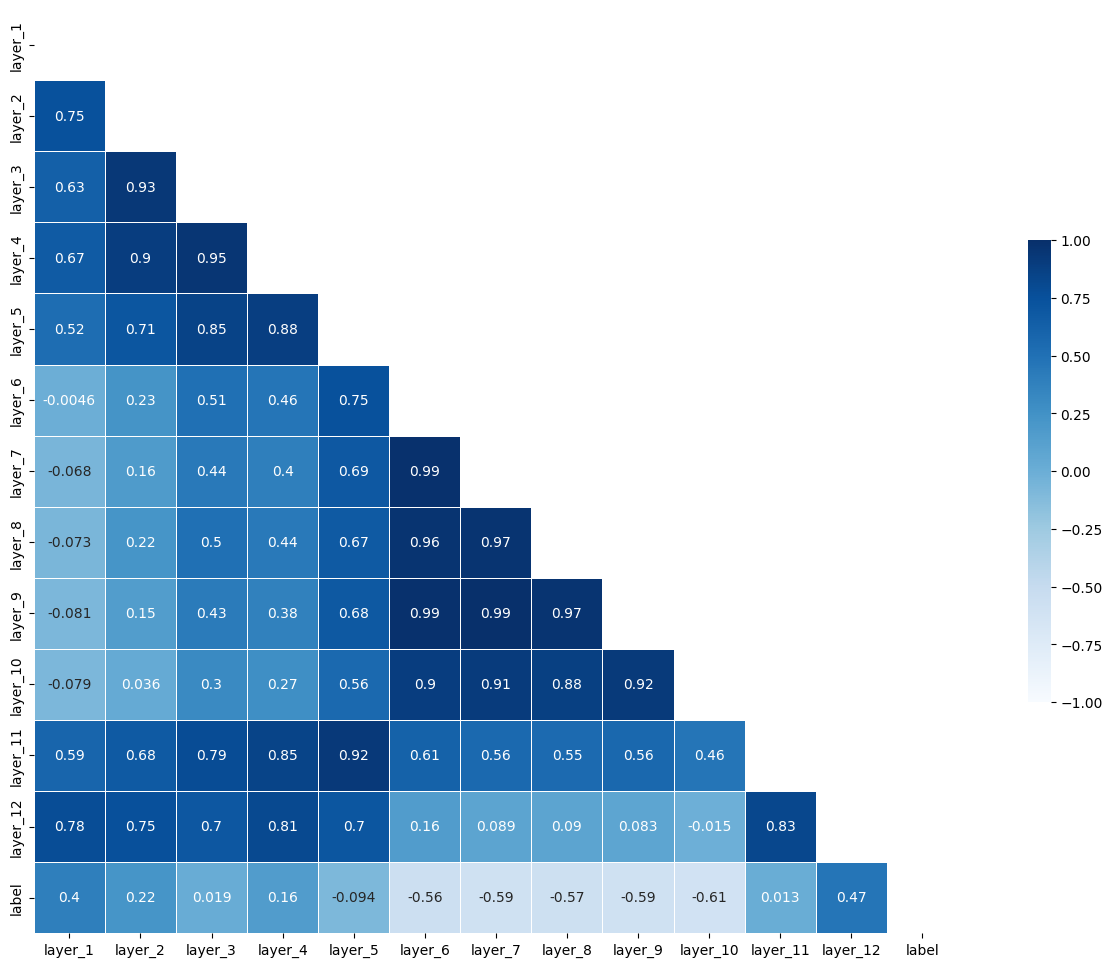

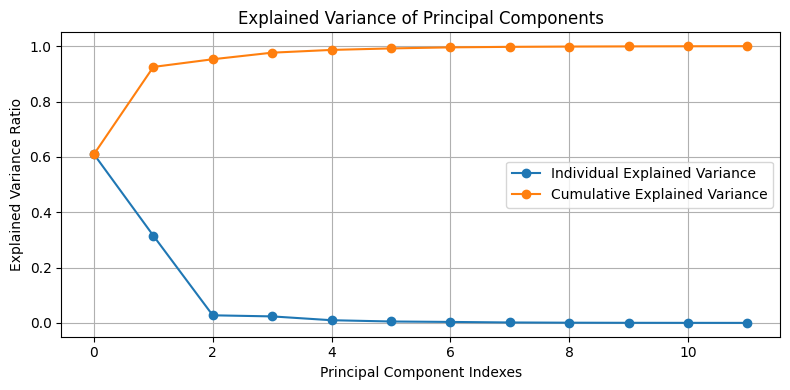

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Cumulative Explained Variance,60.96%,92.50%,95.27%,97.65%,98.65%,99.19%,99.57%,99.75%,99.86%,99.92%,99.96%,100.00%


In [11]:
import rasterio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

number = 656
tiff_path = f"../../data/dataOptimal/EMSR{number}/AOI01/EMSR{number}_AOI01_01/EMSR{number}_AOI01_01_S2L2A.tiff"
tiff_mask_path = f"../../data/dataOptimal/EMSR{number}/AOI01/EMSR{number}_AOI01_01/EMSR{number}_AOI01_01_DEL.tif"

# tiff image
with rasterio.open(tiff_path) as src:
    image = src.read()*10000

image = image.transpose(1, 2, 0) # (12,H,W) -> (H,W,12)
pixels_image = image.reshape(-1, image.shape[-1])

column_names = [f"layer_{i+1}" for i in range(image.shape[-1])]

# mask
with rasterio.open(tiff_mask_path) as src:
    image_mask = src.read()

image_mask = image_mask.transpose(1, 2, 0)
pixels_mask = image_mask.reshape(-1, image_mask.shape[-1])
pixels_mask = pixels_mask.squeeze()

df = pd.DataFrame(pixels_image, columns=column_names)
df["label"] = pixels_mask

print(len(df))
print(df.head())


# --- Correlation ---
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar


# --- PCA ---
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.decomposition import PCA

scaler = MinMaxScaler()

# Apply the scaler to the dataframe
df = df.drop(columns="label")
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

pc = len(df_scaled.columns.values) #number columns = 25
pca = PCA(n_components=pc)
pca.fit(df_scaled)

sns.reset_orig()
sns.set_color_codes('pastel')
plt.figure(figsize = (8,4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.legend(["Individual Explained Variance", "Cumulative Explained Variance"])
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.show()

cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = pd.Series([round(val, 4) for val in cumsum_df['var1']], index = cumsum_df.index)
cumsum_df['Cumulative Explained Variance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cumsum_df['var2']], index = cumsum_df.index)
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1, inplace=False)
cumsum_df.T.iloc[:,:15]

## Scheduler trial

3.0202015671191697e-06


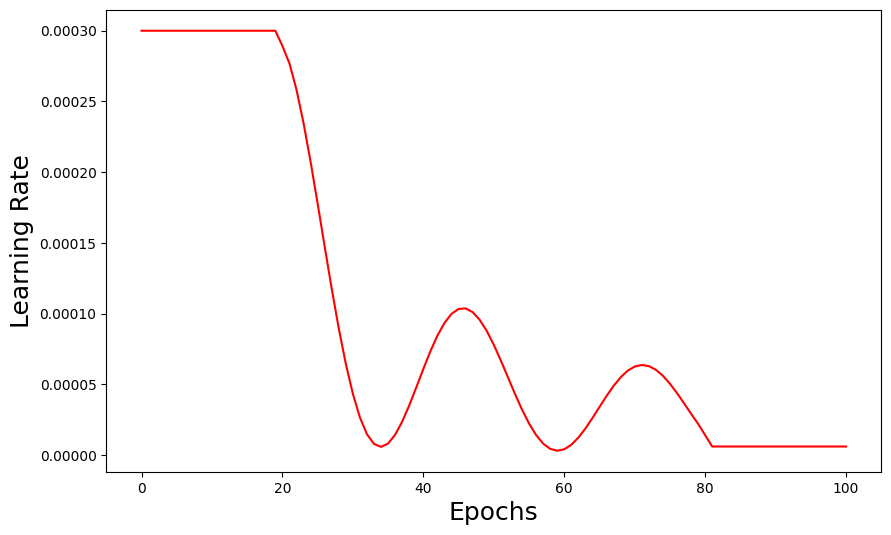

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(0, 20, 1)
x2 = np.arange(20, 80, 1)  # Adjust the upper limit as needed
x3 = np.arange(81, 101, 1)

y1 = np.full_like(x1, 0.0003, dtype=np.double)
y2 = (np.cos(0.25*x2-17.9) + 1.08) / (x2-6)*0.002
y3 = np.full_like(x3, 0.000006, dtype=np.double)

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

# print(x)
print(min(y))

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r')
plt.grid(False)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Learning Rate", rotation=90, fontsize=18)
plt.title("")

plt.savefig("graph.png")
plt.show()